<a href="https://colab.research.google.com/github/mopahlevani/Numerical-Simulation/blob/main/PDE_Training_2_Heat_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving Conductive Heat Transfer: Case of a window, with and without an insulating aire layer

Student Name: Mohammad Hadi Pahlevani

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In this training we wish to solve the 1D  conductive heat transfer problem. We will consider heat transfer in a 1D slab of material It could be a glass window for example.. The medium has a width L and a thermal conductivity K and a specific heat Cp and density $\rho$.



The 1D heat diffusion equations reads :
$$ \frac{\partial T}{\partial t} - \frac{K}{\rho Cp} \frac{\partial^2 T}{\partial x^2} = \frac{SK}{\rho Cp} $$


where S is an energy source term (in $w/m^2$) that is non-zero if we inject energy in the system. For the moment we will assume that S=0

For glass, $K\simeq 1 w/m/K$, Cp=753 J/Kg/K, $\rho=2500 Kg/m^3$

## Diffusion timescale and the Courant condition (CFL)

We assume initially that the glass width is L =1 cm, and that the temperature everywhere is 300K initially. The right (x=0) and left (x=L) temperatures of the glass is $T_L$ and $T_R$. We will change the glass left and right temperatures and see how the temperature profile (T(x) for x ranging from 0 to L) evolves.

By doing a simple dimensional analysis, find a characteristic timescale $T_d$ using L (the width of the window),  $T_d$ as a functio of L, K, $\rho$ $Cp$. $T_d$ is the diffusion timescale. We can also recognize that $D=K/\rho C_p$ is a diffusion coefficient, so the classical theory for diffusion processes applies here...

$T_d=\frac{L^2}{D}$

In [57]:
K = 1 #w/m/k
Cp = 753 # J/Kg/K
Ro = 2500 #Kg/m^3
D = K / (Ro* Cp) #diffusion coefficient
L = 1 # cm
T0 = 300 # k
T_L = 300
T_R = 0
Td = D / L * L
print('Td = ' + str(Td))

Td = 5.312084993359894e-07


## Discretization of the problem

Now we want to solve the diffusion equation using a finite difference method.
We need first to write the integration scheme.
we call $x_i=i*dx$, $t_j=j*dt$ with i,j, integers, and dt and dx standing for the timestep and space step respectively. Let's call $T_i^j$ the numerical approximation to $T(x_i,t_j)$

We start soing first order in time and second order in space.
For the time derive use a forward 1st order derivative. Give the 1st order forward approximation.

$\frac{\partial T}{\partial t}= \frac{T^{j+1}_i-T^j_i}{dt}  +o(dt)$

For the temperature space derivative we need the second order derivative. As diffusion ois a process acting in both directions simultaneously we can use a centered scheme. Provide a 1st order cetered approximation to the second order derivative : You can have a look here : https://en.wikipedia.org/wiki/Finite_difference

$\frac{\partial^2 T}{\partial x^2}=\frac{T^{j}_{i+1}-T^j_{i-1}}{2dx}  +o(dx^2)$

From the above two expressions, build an integration scheme for the Heat diffusion equation :

$T^{j+1}_i=T^{j}_i (1-2 σ) + σ(T^{j}_{i-1} + T^{j}_{i+1}) \\ σ = \frac{Ddt}{dx^2}$

We will discretise space by using N=50 cells. What is the time necessary, $T_{cell}$ for heat to diffuse over a cell ??  


$T_{cell}= \frac {dx^2}{D} = \frac {\frac{L^2}{N^2}}{D} = \frac{L^2}{50^2D}= \frac{T_d}{50^2}$

## Numerically solving heat transfer accross the window

We will make sure, in the following to choose dt < $T_{cell}$. This will be our "CFL" condition in the diffusion case.


As boundary conditions, we will put $T_1^0=T_L$ and $T_N^0=T_R$, with $T_R=300K$ (warm interior) and $T_L=273K$ (freezing cold outside!).

The initial state is $T^0_{2..N-1}=300K$

integrate the evolution of the temperature from t=0 to $t_{end} = 10 T_d$


Write the code that compute the Evolution of the temperature profile. You have to

*1) Define the X axis, dt, dx, the different constant, TR, TL

*2) Initialise T

*3) Do a loop over time.

*4)      Compute dT/dt for each space bin i

*5)      Update T for each space bin i

*6)     Update time

*7)     end of loop








DO : Provide 5 or 6 plots from 0 to $t_{end}$ display how heat is transfered

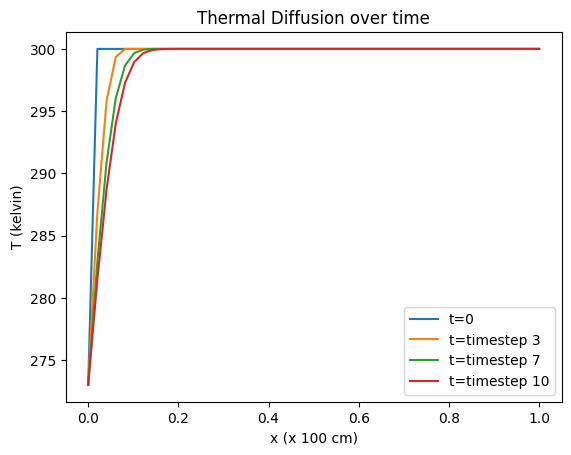

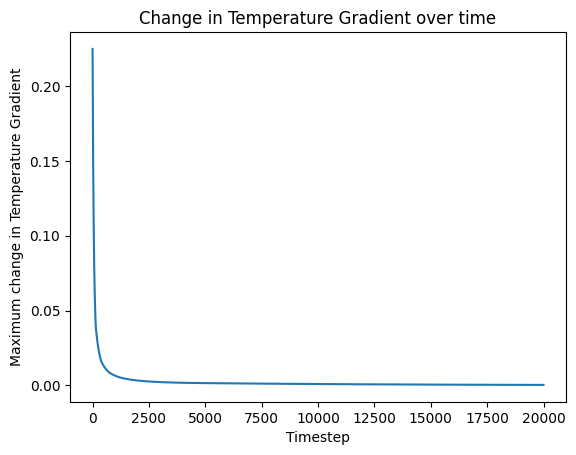

In [78]:
# Step 1: Defining the  X axis, dt, dx, the different constant, TR, TL
K = 1 #w/m/k
Cp = 753 # J/Kg/K
Ro = 2500 #Kg/m^3
D = K / (Ro* Cp) #diffusion coefficient
Td = L**2 / D  # Add this line to define Td
N = 50
Tcell = Td / (N**2)
L = 1
T_L = 273
T_R = 300
h = 0
x = np.linspace(0,L,N)
dx = L / (N-1)
#dt = 0.5 * Td
Tend = 10 * Td
#dt = 0.3 * dx**2 / D
dt = 0.3 * Tcell
sigma = D * dt / dx**2
t = 0
max_iterations = 10
deltaT_noinsulation = np.zeros(max_iterations)


# Step 2: Initialising T
T0 = np.ones(N) * 300
T0[0]=T_L
T0[N-1]=T_R
T = T0
T_new = np.zeros(N)

plt.plot(x,T,label='t=0')

# Step 3: Loop over time
while t < Tend and h < max_iterations:
  for i in range(1,N-1):
    T_new[i] = (1- 2 * sigma) * T[i] + sigma * (T[i-1] + T[i+1])
  T_new[0] = T_L
  T_new[-1] = T_R
  deltaT_noinsulation[h] = np.max(T - T_new)
  T = T_new.copy()
  t += dt
  h += 1
  # Step 4: Visualizing the outcome (part 1)
  if h == 3 or h == 7:
    plt.plot(x,T,label='t=timestep ' + str(h))
# Step 4: Visualizing the outcome (part 2)
plt.plot(x,T,label='t=timestep ' + str(h))
plt.title('Thermal Diffusion over time')
plt.xlabel('x (x 100 cm)')
plt.ylabel('T (kelvin)')
plt.legend()
plt.show()

plt.plot(deltaT)
plt.title('Change in Temperature Gradient over time')
plt.xlabel('Timestep')
plt.ylabel('Maximum change in Temperature Gradient')
plt.show()

DO : show that at equilibrium the thermal gradient is constant.

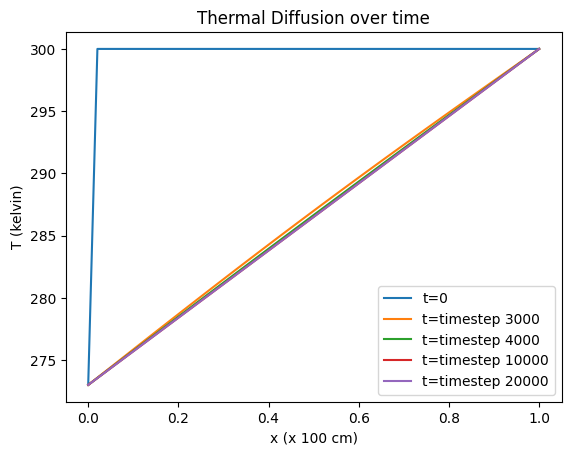

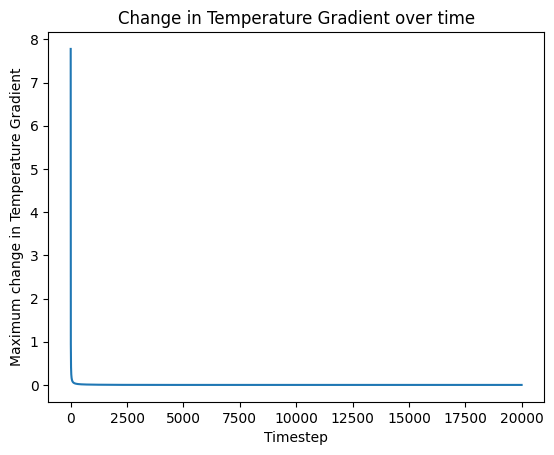

In [79]:
# Step 1: Defining the  X axis, dt, dx, the different constant, TR, TL
K = 1 #w/m/k
Cp = 753 # J/Kg/K
Ro = 2500 #Kg/m^3
D = K / (Ro* Cp) #diffusion coefficient
Td = L**2 / D  # Add this line to define Td
N = 50
Tcell = Td / (N**2)
L = 1 # 100 cm
T_L = 273
T_R = 300
h = 0
x = np.linspace(0,L,N)
dx = L / (N-1)
#dt = 0.5 * Td
Tend = 10 * Td
#dt = 0.3 * dx**2 / D
dt = 0.3 * Tcell
sigma = D * dt / dx**2
t = 0
max_iterations = 10
deltaT_noinsulation = np.zeros(max_iterations)

h = 0
max_iterations = 20000
deltaT_noinsulation = np.zeros(max_iterations)

max_iterations_comparison = 30
deltaT_noinsulation_comparison = np.zeros(max_iterations_comparison)

# Step 2: Initialising T
T0 = np.ones(N) * 300
T0[0]=T_L
T0[N-1]=T_R
T = T0
T_new = np.zeros(N)

plt.plot(x,T,label='t=0')

# Step 3: Loop over time
while t < Tend and h < max_iterations:
  for i in range(1,N-1):
    T_new[i] = (1- 2 * sigma) * T[i] + sigma * (T[i-1] + T[i+1])
  T_new[0] = T_L
  T_new[-1] = T_R
  deltaT_noinsulation[h] = np.max(T - T_new)
  if h < max_iterations_comparison : deltaT_noinsulation_comparison[h] = np.max(T - T_new)
  T = T_new.copy()
  t += dt
  h += 1
  # Step 4: Visualizing the outcome (part 1)
  if h == 3000 or h == 4000 or h == 10000:
    plt.plot(x,T,label='t=timestep ' + str(h))

# Step 4: Visualizing the outcome (part 2)
plt.plot(x,T,label='t=timestep ' + str(h))
plt.title('Thermal Diffusion over time')
plt.xlabel('x (x 100 cm)')
plt.ylabel('T (kelvin)')
plt.legend()
plt.show()

plt.plot(deltaT_noinsulation)
plt.title('Change in Temperature Gradient over time')
plt.xlabel('Timestep')
plt.ylabel('Maximum change in Temperature Gradient')
plt.show()

## Heat flux toward the exterior : energy loss

At equilibrium what is the heat flux ? F=-K$\frac{\partial T}{\partial x}$, with K standing for the diffusion coefficient

$F=- K \frac{ΔT}{Δx} = - K \frac{T_R-T_L}{L}$

## Inserting an insulating air-layer

Now we put an insulating layer with air. So our window is like a "sandwich", with 0.3 mm of glass, 0.4 mm of air, 0.3 mm of glass.  Air characteristics are at 273K :
K=0.025 W/m/K , Cp=1005 J/K/Kg, and $\rho= 1.30 Kg/m^3$.

Redo the same exercice as above :

Write the new code (BEWARE : now K, RHO, Cp are not the same evrywhere!!!!)

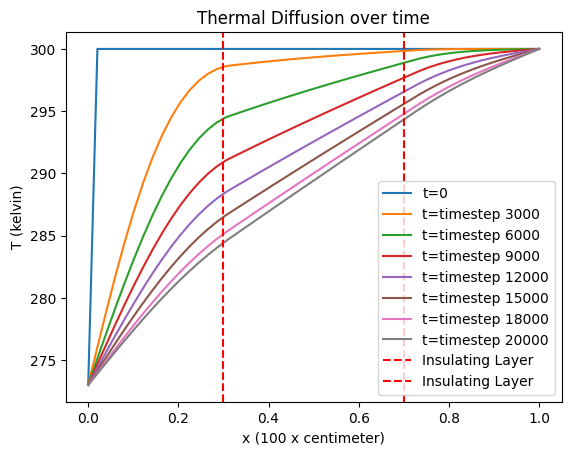

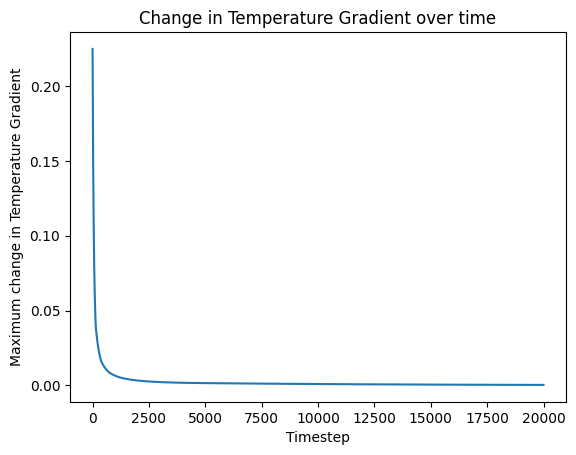

In [95]:
# Step 1: Defining the  X axis, dt, dx, the different constant, TR, TL
K = 1 #w/m/k
Cp = 753 # J/Kg/K
Ro = 2500 #Kg/m^3
K_glass = 0.025
Cp_glass = 1005
Ro_glass = 1.30
D = K / (Ro* Cp) #diffusion coefficient
D_glass = K_glass / (Ro_glass * Cp_glass)
L = 1 #100 cm
Td = L**2 / D
N = 50
Tcell = Td / (N**2)

T_L = 273
T_R = 300
h = 0
x = np.linspace(0,L,N)
dx = L / (N-1)
#dt = 0.5 * Td
Tend = 10 * Td
#dt = 0.3 * dx**2 / D

dt = 0.3 * dx**2 / max(D, D_glass)
t = 0

sigma = D * dt / dx**2
sigma_glass = D_glass * dt / dx**2


max_iterations = 20000
max_iterations_comparison = 30
deltaT_insulation_comparison = np.zeros(max_iterations_comparison)
deltaT_insulation = np.zeros(max_iterations)


# Step 2: Initialising T
T0 = np.ones(N) * 300
T0[0]=T_L
T0[N-1]=T_R
T = T0
T_new = np.zeros(N)
x1 =  int(0.3 * N) + 1
x2 =  int(0.7 * N) + 1
if x1 < 1 or x2 >= N-1:  raise ValueError("Invalid indices for insulating layer boundaries.")
#print(x1,x2)
plt.plot(x,T,label='t=0')

# Step 3: Loop over time
while t < Tend and h < max_iterations:
  for i in range(1, x1):
    T_new[i] = (1- 2 * sigma) * T[i] + sigma * (T[i-1] + T[i+1])
    #if t == dt: print("x_glass"+str(i*L/N))
  for i in range(x1, x2):
    T_new[i] = (1- 2 * sigma_glass) * T[i] + sigma_glass * (T[i-1] + T[i+1])
    #if t == dt: print("x_air"+str(i*L/N))
  for i in range(x2,N-1):
    T_new[i] = (1- 2 * sigma) * T[i] + sigma * (T[i-1] + T[i+1])
    #if t == dt: print("x_glass"+str(i*L/N))
  T_new[0] = T_L
  T_new[-1] = T_R
  deltaT_insulation[h] = np.max(np.abs(T - T_new))  # Ensure positive difference
  if h < max_iterations_comparison: deltaT_insulation_comparison[h] = np.max(np.abs(T - T_new))
  T = T_new.copy()
  t += dt
  h += 1
  # Step 4: Visualizing the outcome (part 1)
  if h%3000==0:
    plt.plot(x,T,label='t=timestep ' + str(h))
#print(deltaT)
# Step 4: Visualizing the outcome (part 2)
plt.plot(x,T,label='t=timestep ' + str(h))
plt.axvline(x=0.3, color='red', linestyle='--', label='Insulating Layer')
plt.axvline(x=0.7, color='red', linestyle='--', label='Insulating Layer')
plt.title('Thermal Diffusion over time')
plt.xlabel('x (100 x centimeter)')
plt.ylabel('T (kelvin)')
plt.legend()
plt.show()

plt.plot(deltaT_insulation)
plt.title('Change in Temperature Gradient over time')
plt.xlabel('Timestep')
plt.ylabel('Maximum change in Temperature Gradient')
plt.show()


What is the effect of the insulating layer ? Show with plots

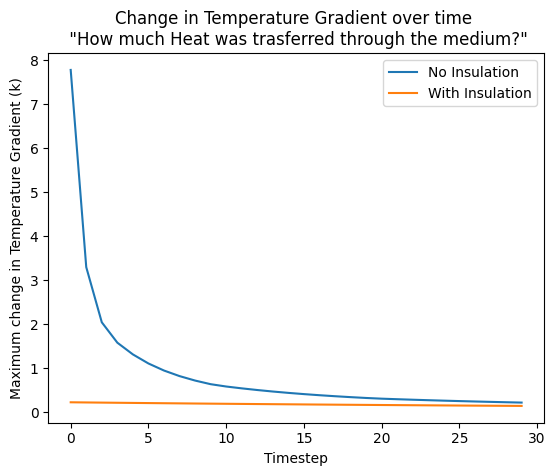

In [94]:
plt.plot(deltaT_noinsulation_comparison, label = 'No Insulation')
plt.plot(deltaT_insulation_comparison, label = 'Insulation')
plt.title('Change in Temperature Gradient over time \n "How much Heat was trasferred through the medium?"')
plt.xlabel('Timestep')
plt.ylabel('Maximum change in Temperature Gradient (k)')
plt.legend(['No Insulation', 'With Insulation'])
plt.show()

What is the Thermal profile in the thickness of the window ?


*The presence of the air insulator layer changes the temperature gradient due to its lower thermal conductivity, both theory and simulation results confirm. Without the air layer, the gradient is linear at $t = ∞$ equilibrium , indicating steady conduction. With the air layer, the gradient shows a steeper drop across the glass and a flatter region in the air layer, highlighting its insulating effect, even present at $t = ∞$ equilibrium.*

What is the final heat flux ?

Conclusion ? What is the interest of the insulating layer ?


*The final heat flux is $Q=k\frac{ΔT}{Δx}$. \\
With the latest plot showing $Q_{without Insulation} < Q_{with Insulation} $, a reduction of Heat transfer when insulation was introduced. The insulating layer significantly improves thermal performance by minimizing heat transfer through the window, contributing to better efficiency and reducing heating or cooling costs in real-world cases.*